# Group 1 Data Analytics Project
## Hurricane Dataset from 1851 - 2010

In this dataset we are going to look at some historical hurricane data to answer a variety of questions relating to storm frequency and intensity.  This dataset is only looking at those storms that have been recorded by the United States National Oceanic and Atmospheric Association (NOAA).

### Importing the Data

First we use the following code to import the data into the Jupyter notebook.  

__Note:__ This Excel file exists in the Module 6 lesson folder so if using a Jupyter notebook with a different working directory you may need to alter the path name to correspond with your working directory.

In [1]:
import pandas as pd
path = ('Group1 Project1 Hurricane Dataset.xlsx')
xl = pd.read_excel(path)
print(xl.head(5))

   Year     Storm  Number Month   Day      Time    Lat   Long Direction  \
0  1851  NOTNAMED       1  June  24.0  18:00:00  28.0N  94.8W        --   
1  1851  NOTNAMED       1  June  25.0  00:00:00  28.0N  95.4W       270   
2  1851  NOTNAMED       1  June  25.0  06:00:00  28.0N  96.0W       270   
3  1851  NOTNAMED       1  June  25.0  12:00:00  28.1N  96.5W       285   
4  1851  NOTNAMED       1  June  25.0  18:00:00  28.2N  97.0W       285   

  GndSpeed WindSpeed Pressure StormClass  HurrCat  
0       --        90       --  Hurricane      1.0  
1        5        90       --  Hurricane      1.0  
2        5        90       --  Hurricane      1.0  
3        4        90       --  Hurricane      1.0  
4        4        80       --  Hurricane      1.0  


### Counting the Number of Hurricanes in the Dataset

In this section we are going to be creating a new DataFrame that we will use to count the total number of Hurricanes listed in our dataset.  This is made more difficult by the fact that NOAA did not begin naming hurricanes until 1950.  We can create a unique indentifier for each storm by using two columns:  Year and Number.  We will add Storm as well for future use.

In [2]:
hurrcnt = xl[['Year', 'Storm', 'Number']]
hurrcount = hurrcnt.drop_duplicates()
print(hurrcount.head(5))

print('\nThere are {} total hurricanes listed in the dataset'.format(len(hurrcount)))

    Year     Storm  Number
0   1851  NOTNAMED       1
13  1851  NOTNAMED       2
14  1851  NOTNAMED       3
15  1851  NOTNAMED       4
63  1851  NOTNAMED       5

There are 1446 total hurricanes listed in the dataset


### Are the Frequency of Storms Tracked by NOAA Increasing?

In this section we will compare the frequency of storms by decade beginning in the 1850's

No handles with labels found to put in legend.


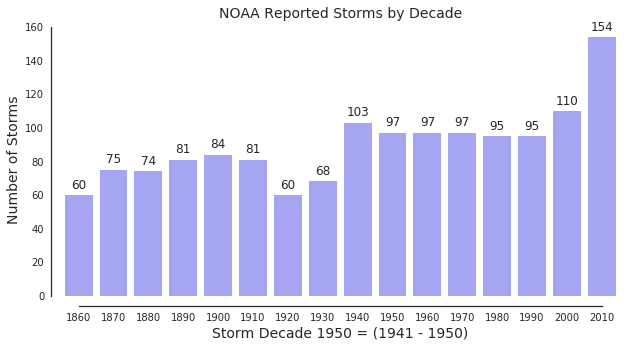

In [3]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")
sns.set(style="white")


#This builds a dictionary with the decade as key and the number of storms as value
stormdecade = {}
stormyear = 1860
cntr = 0
for index, row in hurrcount.iterrows():
    if row['Year'] <= stormyear:
        cntr += 1    
    else:
        decadeadd = {stormyear:cntr}
        stormdecade.update(decadeadd)
        stormyear = stormyear + 10
        cntr = 0
decadeadd = {stormyear:cntr}
stormdecade.update(decadeadd)   


#This creates the lists for our data plot        
keylist=[]
vallist=[]
for key in stormdecade.keys():
    keylist.append(key)
for val in stormdecade.values():
    vallist.append(val)
    
#This creates the dataplot
fig, ax = plt.subplots(figsize = (10,5))

x = keylist
y = vallist
ax = sns.barplot(x, y, color = 'blue', alpha = 0.4)

for n, (label, _y) in enumerate(zip(x, y)):
    ax.annotate(
        s='{:.0f}'.format(_y),
        xy=(n, _y),
        ha='center',va='center',
        xytext=(0,10),
        textcoords='offset points')

# Set our axis labels and plot title
ax.set_title("NOAA Reported Storms by Decade", fontsize=14)
ax.set_xlabel("Storm Decade 1950 = (1941 - 1950)", fontsize=14)

ax.set_ylabel("Number of Storms", fontsize=14)

ax.legend(fontsize=14)

sns.despine(offset=10, trim=True)


### Are the Intensity of the Storms Increasing?

This section compares the instances of major storms looking at the same period of time.  We will define major storms as those labeled "Hurricane" by NOAA.  In addition we will compare the classification of "Major Hurricane" (those hurricanes rated category 3 or higher) over the same time period.

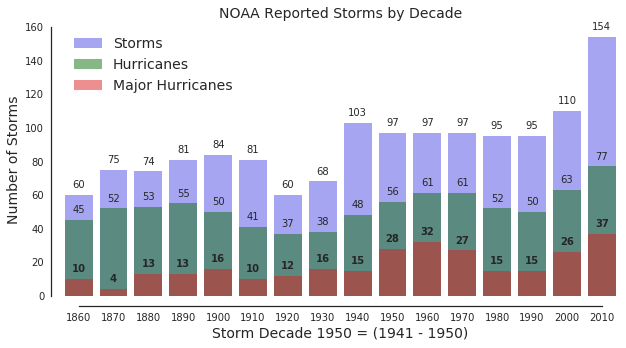

In [4]:
hurrcat = xl.loc[(xl['StormClass'] == 'Hurricane')]
hurrcatmaj = xl.loc[(xl['StormClass'] == 'Major Hurricane')]
minhurrdat = hurrcat[['Year', 'Storm', 'Number', 'StormClass']]
minhurr = minhurrdat.drop_duplicates()
majhurrdat = hurrcatmaj[['Year', 'Storm', 'Number', 'StormClass']]
majhurr = majhurrdat.drop_duplicates()

#This builds a dictionary with the decade as key and the number of hurricanes as value
hurrdecade = {}
hurryear = 1860
cntr = 0
for index, row in minhurr.iterrows():
    if row['Year'] <= hurryear:
        cntr += 1    
    else:
        hurrdecadeadd = {hurryear:cntr}
        hurrdecade.update(hurrdecadeadd)
        hurryear = hurryear + 10
        cntr = 0
hurrdecadeadd = {hurryear:cntr}
hurrdecade.update(hurrdecadeadd)   


#This creates the lists for our data plot        
hurrkeylist=[]
hurrvallist=[]
for key in hurrdecade.keys():
    hurrkeylist.append(key)
for val in hurrdecade.values():
    hurrvallist.append(val)

    
#This builds a dictionary with the decade as key and the number of major hurricanes as value
majhurrdecade = {}
majhurryear = 1860
cntr = 0
for index, row in majhurr.iterrows():
    if row['Year'] <= majhurryear:
        cntr += 1    
    else:
        majhurrdecadeadd = {majhurryear:cntr}
        majhurrdecade.update(majhurrdecadeadd)
        majhurryear = majhurryear + 10
        cntr = 0
majhurrdecadeadd = {majhurryear:cntr}
majhurrdecade.update(majhurrdecadeadd)   


#This creates the lists for our data plot        
majhurrkeylist=[]
majhurrvallist=[]
for key in majhurrdecade.keys():
    majhurrkeylist.append(key)
for val in majhurrdecade.values():
    majhurrvallist.append(val)



#This creates the dataplot
fig, ax = plt.subplots(figsize = (10,5))

x = keylist
y = vallist
y2 = hurrvallist
y3 = majhurrvallist
ax = sns.barplot(x, y, color = 'blue', alpha = 0.4, label = 'Storms')
ax = sns.barplot(x, y2, color = 'green', alpha = 0.5, label = 'Hurricanes')
ax = sns.barplot(x, y3, color = 'red', alpha = 0.5, label = 'Major Hurricanes')

for n, (label, _y) in enumerate(zip(x, y)):
    ax.annotate(
        s='{:.0f}'.format(_y),
        xy=(n, _y),
        ha='center',va='center',
        xytext=(0,10),
        textcoords='offset points')
    
for n, (label, _y) in enumerate(zip(x, y2)):
    ax.annotate(
        s='{:.0f}'.format(_y),
        xy=(n, _y),
        ha='center',va='center',
        xytext=(0,10),
        textcoords='offset points')
    
for n, (label, _y) in enumerate(zip(x, y3)):
    ax.annotate(
        s='{:.0f}'.format(_y),
        xy=(n, _y),
        ha='center',va='center',
        xytext=(0,10),
        textcoords='offset points',
        weight='bold')
    
# Set our axis labels and plot title
ax.set_title("NOAA Reported Storms by Decade", fontsize=14)
ax.set_xlabel("Storm Decade 1950 = (1941 - 1950)", fontsize=14)

ax.set_ylabel("Number of Storms", fontsize=14)

ax.legend(fontsize=14)

sns.despine(offset=10, trim=True)


## Conclusion

Looking at the data, the number of storms were fairly consistent from decade to decade in the years 1931 - 2000.  However, it is clear to see that the number of reported storms have significantly increased in the decade ending in 2010 (Years 2001 - 2010).  In comparing the decade ending in 2010 with the decade ending in 2000 (Years 1991 - 2000) the differences are fairly startling:

* __The number of storms increased 40.9%__
* __The number of hurricanes increased 22.2%__
* __The number of major hurricanes increased 42.3%__

However, as data scientists we need to properly interpret the data from all angles.  When comparing the **_ratios_** of hurricanes and major hurricanes within the two decades the data is not as eye popping:

* The ratio of hurricanes to storms for the ten years ending 2000 was 57.3%
* The ratio of hurricanes to storms for the ten years ending 2010 was 49.7%
     * __There were fewer hurricanes as a percent of total storms for the decade ending in 2010__

* The ratio of major hurricanes to storms for the ten years ending 2000 was 23.6%
* The ratio of major hurricanes to storms for the ten years ending 2010 was 23.9%
     * __The number of major hurricanes as a percent of total storms for the decade ending in 2010 was essentially unchanged__
     
The ratios of hurricanes to storms and major hurricanes to storms for last one hundred years are actually very similar.  The one large outlier in the data remains though:  The years 2001 - 2010 saw a MAJOR increase in storm activity.  This might even be classified as unprecedented.  Further study into the probable causes or underlying meanings of this significant change would certainly be warranted.      

/home/jovyan/work/lessons/Module6
